<a href="https://colab.research.google.com/github/IKosovych/ucu-recommender-system-2023/blob/master/ExploratoryDataAnalysis/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install -U kaleido

In [2]:
import pandas as pd
import numpy as np

import plotly.express as px

import math

In [3]:
df_movies = pd.read_csv('movies.csv')
df_ratings = pd.read_csv('ratings.csv')
df_tags = pd.read_csv('tags.csv')
df_links = pd.read_csv('links.csv')

In [4]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [7]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [8]:
df_init = df_ratings.merge(df_movies, left_on='movieId', right_on='movieId')
df = df_init.copy()

In [9]:
df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [10]:
# count of movies
len(df['movieId'].value_counts())

9724

In [11]:
# count of users
len(df['userId'].value_counts())

610

## In the real-world, ratings are very sparse and data points are mostly collected from very popular movies and highly engaged users (long-tail property).

In [12]:
df_movies_ratings = pd.DataFrame(df.groupby(by=['movieId'])['rating'].count().sort_values(ascending=False)).reset_index(drop=True)

In [13]:
fig = px.bar(df_movies_ratings, x=df_movies_ratings.index, y='rating',
             labels = {'index': 'Movie index ordered by decreasing frequency',
                       'rating': 'Number of ratings'})
fig.update_traces(marker_color = 'blue', marker_line_color = 'blue')
fig.show('svg')

In [14]:
df_user_ratings = df.groupby(by=['userId'])['rating'].count().sort_values(ascending=False).reset_index(drop=True)

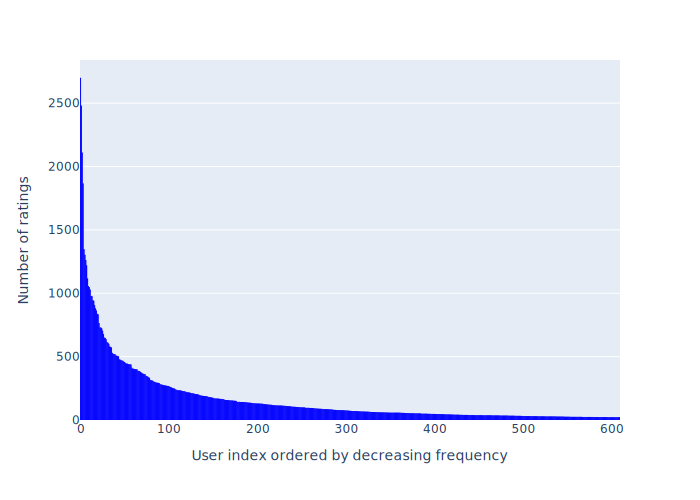

In [15]:
fig = px.bar(df_user_ratings, x=df_user_ratings.index, y='rating',
             labels = {'index': 'User index ordered by decreasing frequency',
                       'rating': 'Number of ratings'})
fig.update_traces(marker_color = 'blue', marker_line_color = 'blue')
fig.show('svg')

## Ratings` distribution

In [16]:
df_1 = df.copy()
df_1['new_rating'] = df_1['rating'].apply(lambda x: x if math.modf(x)[0] == 0 else x + 0.1)
df_ratings = pd.DataFrame(np.round(df_1['new_rating']).value_counts()).reset_index(drop=False).rename(columns={
    'index': 'rating',
    'new_rating': 'count'}).sort_values(by=['rating'], ascending=False)
df_ratings['rating'] = ['5 stars', '4 stars', '3 stars', '2 stars', '1 star']

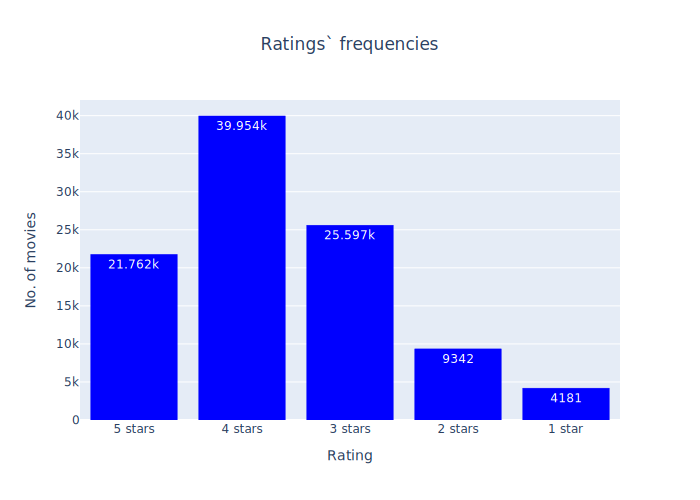

In [17]:
fig = px.bar(df_ratings, x="rating", y='count',
             labels = {'count': 'No. of movies',
                       'rating': 'Rating'},
             text_auto = True,
             title="Ratings` frequencies")
fig.update_traces(marker_color = 'blue', marker_line_color = 'blue')
fig.update_layout(title_x=0.5)
fig.show('svg')

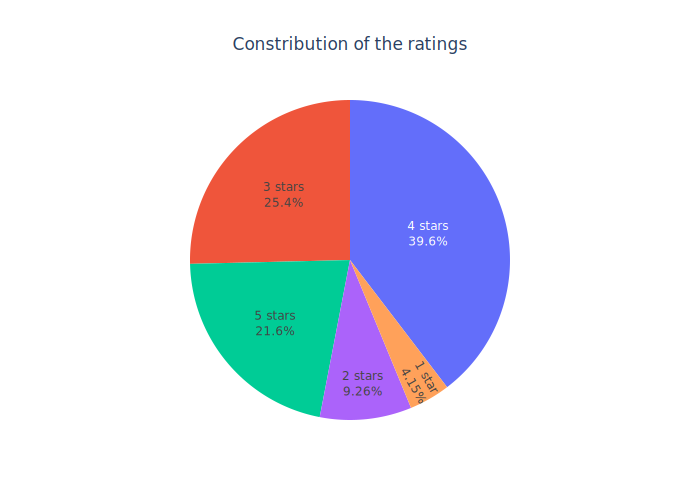

In [18]:
fig = px.pie(df_ratings, names="rating", values='count',
             title = 'Constribution of the ratings')
fig.update_traces(textposition='inside', textinfo='percent+label', showlegend=False)
fig.update_layout(title_x=0.5)
fig.show('svg')

## Genres` distribution

In [19]:
df_1['split_genres'] = df_1['genres'].apply(lambda x: x.split('|'))

In [20]:
from itertools import chain
genres_list = list(chain(*list(df_1['split_genres'])))
genres = pd.DataFrame(pd.Series(genres_list).value_counts())

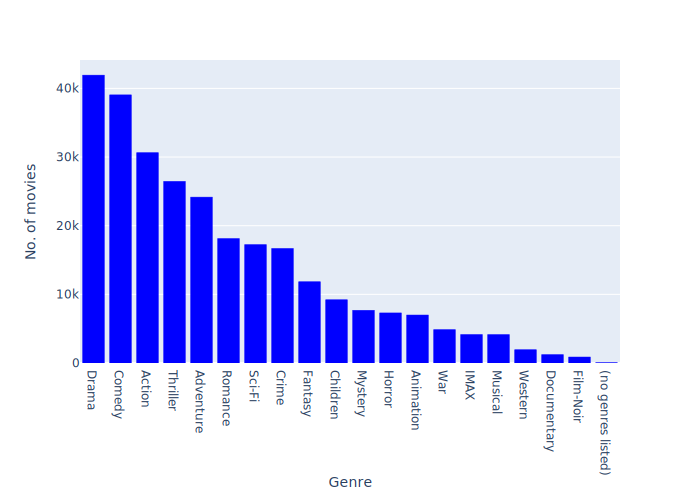

In [21]:
fig = px.bar(genres, x=genres.index, y=0,
             labels = {'0': 'No. of movies',
                       'index': 'Genre'})
fig.update_traces(marker_color = 'blue', marker_line_color = 'blue')
fig.show('svg')

## Top movies

In [22]:
df_movies_stats_1 = df[['title', 'rating']].groupby(by=['title']).mean().reset_index(drop=False).rename(columns={
    'rating': 'avg. rating'})
df_movies_stats_2 = df[['title', 'rating']].groupby(by=['title']).count().reset_index(drop=False).rename(columns={
    'rating': 'no. of users who rated'})

df_movies_stats = df_movies_stats_1.merge(df_movies_stats_2, left_on='title', right_on='title')

In [23]:
# TOP-10 most popular movies
df_movies_stats.sort_values(by=['no. of users who rated'], ascending=False)[:10]

,title,avg. rating,no. of users who rated
3158,Forrest Gump (1994),4.164134,329
7593,"Shawshank Redemption, The (1994)",4.429022,317
6865,Pulp Fiction (1994),4.197068,307
7680,"Silence of the Lambs, The (1991)",4.161290,279
5512,"Matrix, The (1999)",4.192446,278
8001,Star Wars: Episode IV - A New Hope (1977),4.231076,251
4662,Jurassic Park (1993),3.750000,238
1337,Braveheart (1995),4.031646,237
8363,Terminator 2: Judgment Day (1991),3.970982,224
7421,Schindler's List (1993),4.225000,220


In [24]:
# TOP-10 high-rated movies
df_movies_stats.sort_values(
    by=['avg. rating'], ascending=False)[:10]

,title,avg. rating,no. of users who rated
3354,Gena the Crocodile (1969),5.0,1
8951,True Stories (1986),5.0,1
1986,Cosmic Scrat-tastrophe (2015),5.0,1
5269,Love and Pigeons (1985),5.0,1
7033,Red Sorghum (Hong gao liang) (1987),5.0,1
8661,"Thin Line Between Love and Hate, A (1996)",5.0,1
5019,Lesson Faust (1994),5.0,2
2799,Eva (2011),5.0,1
9435,Who Killed Chea Vichea? (2010),5.0,1
7662,Siam Sunset (1999),5.0,1


In [25]:
# TOP-10 high-rated movies (at least by 10 users)
df_movies_stats[df_movies_stats['no. of users who rated']>=10].sort_values(
    by=['avg. rating'], ascending=False)[:10]

,title,avg. rating,no. of users who rated
7486,Secrets & Lies (1996),4.590909,11
3672,Guess Who's Coming to Dinner (1967),4.545455,11
6505,Paths of Glory (1957),4.541667,12
8110,"Streetcar Named Desire, A (1951)",4.475000,20
1641,"Celebration, The (Festen) (1998)",4.458333,12
6964,Ran (1985),4.433333,15
7593,"Shawshank Redemption, The (1994)",4.429022,317
3953,His Girl Friday (1940),4.392857,14
346,All Quiet on the Western Front (1930),4.350000,10
4152,"Hustler, The (1961)",4.333333,18


## Top-10 popular movies in TOP-3 popular genres

In [26]:
df_2 = df_1[['userId', 'movieId', 'rating', 'title', 'split_genres']].copy()

In [27]:
one_hot_encoded = pd.get_dummies(df_2['split_genres'].apply(pd.Series).stack()).sum(level=0)

<ipython-input-27-c36a1b19da0c>:1: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().



In [28]:
df_genres = pd.concat([df_2[['userId', 'movieId', 'rating', 'title']], one_hot_encoded], axis=1)

#### Drama

In [29]:
df_drama = df_genres[df_genres['Drama']==1]

In [30]:
df = df_drama
df_movies_stats_1 = df[['title', 'rating']].groupby(by=['title']).mean().reset_index(drop=False).rename(columns={
    'rating': 'avg. rating'})
df_movies_stats_2 = df[['title', 'rating']].groupby(by=['title']).count().reset_index(drop=False).rename(columns={
    'rating': 'no. of users who rated'})

df_movies_stats = df_movies_stats_1.merge(df_movies_stats_2, left_on='title', right_on='title')

In [31]:
# TOP-10 most popular movies
df_movies_stats.sort_values(by=['no. of users who rated'], ascending=False)[:10]

,title,avg. rating,no. of users who rated
1432,Forrest Gump (1994),4.164134,329
3407,"Shawshank Redemption, The (1994)",4.429022,317
3065,Pulp Fiction (1994),4.197068,307
592,Braveheart (1995),4.031646,237
3331,Schindler's List (1993),4.225000,220
1359,Fight Club (1999),4.272936,218
173,American Beauty (1999),4.056373,204
244,Apollo 13 (1995),3.845771,201
1579,"Godfather, The (1972)",4.289062,192
3321,Saving Private Ryan (1998),4.146277,188


#### Comedy

In [32]:
df_comedy = df_genres[df_genres['Comedy']==1]

In [33]:
df = df_comedy
df_movies_stats_1 = df[['title', 'rating']].groupby(by=['title']).mean().reset_index(drop=False).rename(columns={
    'rating': 'avg. rating'})
df_movies_stats_2 = df[['title', 'rating']].groupby(by=['title']).count().reset_index(drop=False).rename(columns={
    'rating': 'no. of users who rated'})

df_movies_stats = df_movies_stats_1.merge(df_movies_stats_2, left_on='title', right_on='title')

In [34]:
# TOP-10 most popular movies
df_movies_stats.sort_values(by=['no. of users who rated'], ascending=False)[:10]

,title,avg. rating,no. of users who rated
1181,Forrest Gump (1994),4.164134,329
2713,Pulp Fiction (1994),4.197068,307
3442,Toy Story (1995),3.920930,215
116,Aladdin (1992),3.792350,183
1095,Fargo (1996),4.116022,181
3472,True Lies (1994),3.497191,178
280,Back to the Future (1985),4.038012,171
3002,Shrek (2001),3.867647,170
2187,Men in Black (a.k.a. MIB) (1997),3.487879,165
75,Ace Ventura: Pet Detective (1994),3.040373,161


#### Action

In [35]:
df_action = df_genres[df_genres['Action']==1]

In [36]:
df = df_action
df_movies_stats_1 = df[['title', 'rating']].groupby(by=['title']).mean().reset_index(drop=False).rename(columns={
    'rating': 'avg. rating'})
df_movies_stats_2 = df[['title', 'rating']].groupby(by=['title']).count().reset_index(drop=False).rename(columns={
    'rating': 'no. of users who rated'})

df_movies_stats = df_movies_stats_1.merge(df_movies_stats_2, left_on='title', right_on='title')

In [37]:
# TOP-10 most popular movies
df_movies_stats.sort_values(by=['no. of users who rated'], ascending=False)[:10]

,title,avg. rating,no. of users who rated
1038,"Matrix, The (1999)",4.192446,278
1505,Star Wars: Episode IV - A New Hope (1977),4.231076,251
861,Jurassic Park (1993),3.750000,238
249,Braveheart (1995),4.031646,237
1592,Terminator 2: Judgment Day (1991),3.970982,224
551,Fight Club (1999),4.272936,218
1506,Star Wars: Episode V - The Empire Strikes Back...,4.215640,211
795,Independence Day (a.k.a. ID4) (1996),3.445545,202
1279,Raiders of the Lost Ark (Indiana Jones and the...,4.207500,200
1507,Star Wars: Episode VI - Return of the Jedi (1983),4.137755,196


## Data Preperation for modeling

In [38]:
df_dataset = df_init.pivot(index='movieId',columns='userId',values='rating')
df_dataset.fillna(0,inplace=True)
dataset = np.array(df_dataset)

In [39]:
# rows - movies
# columns - users
dataset.shape

(9724, 610)

In [40]:
dataset

array([[4. , 0. , 0. , ..., 2.5, 3. , 5. ],
       [0. , 0. , 0. , ..., 2. , 0. , 0. ],
       [4. , 0. , 0. , ..., 2. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

### Check dataset sparsity

In [41]:
sparsity = 1.0 - (np.count_nonzero(dataset) / float(dataset.size))
print(f"Sparsity of the dataset is {np.round(sparsity, 2)*100} %")

Sparsity of the dataset is 98.0 %
